In [79]:
import pandas as pd #Initilize dataframe + manipulate data

import seaborn as sns #Plot stats

import numpy as np #Perform least-squares to estimate Beta vector

from numpy.linalg import inv #For taking matrix inverse

import matplotlib.pyplot as plt #Plot UI

from sklearn.model_selection import train_test_split #Train-Test split

from sklearn.linear_model import LassoCV #Lasso Regression

from sklearn.preprocessing import StandardScaler #Feature Scaling

from sklearn.metrics import r2_score #R^2 Score Calculation for Lasso Regression

Create dataframe

In [80]:
df = pd.read_csv('Housing.csv') #Read CSV file into dataframe

Import Statements

In [81]:
df #View datafram and look at data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [82]:
#features

intercept = [1] * len(df)

#Create X matrix
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']].copy()

#Insert incerpt column
X.insert(loc=0, column='intercept', value=intercept)

#response
y = df['price']

Data preprocessing

In [83]:
#Manually encode categorical data

X['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})

X['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})

X['basement'] = df['basement'].map({'yes': 1, 'no': 0})

X['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})

X['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})

X['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})

X['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished':2})

View processed data in dataframe

In [84]:
X

,intercept,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1,7420,4,2,3,1,0,0,0,1,2,1,2
1,1,8960,4,4,4,1,0,0,0,1,3,0,2
2,1,9960,3,2,2,1,0,1,0,0,2,1,1
3,1,7500,4,2,2,1,0,1,0,1,3,1,2
4,1,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1,3000,2,1,1,1,0,1,0,0,2,0,0
541,1,2400,3,1,1,0,0,0,0,0,0,0,1
542,1,3620,2,1,1,1,0,0,0,0,0,0,0
543,1,2910,3,1,1,0,0,0,0,0,0,0,2


In [85]:
#Check for null values in dataset
print(X.isnull().sum())

intercept           0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Set-up train and test split: 80% train - 20% test

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Implement Multiple Linear Regression from scratch on training data




Beta = $(X'X)^{-1}$ $(X'y)$




p1: $(X'X)^{-1}$               


p2: $(X'y)$

In [87]:
#Compute p1

X_transpose = np.transpose(X_train)

X_mult_X_transpose = np.dot(X_transpose, X_train)

p1 = inv(X_mult_X_transpose)

#Compute p2

p2 = np.dot(X_transpose,y_train)

#Calculate beta
beta = np.dot(p1,p2)

#Print beta
beta

array([-1.27711167e+05,  2.35848772e+02,  7.85744924e+04,  1.09711727e+06,
        4.06223164e+05,  3.66824192e+05,  2.33146766e+05,  3.93159779e+05,
        6.87881311e+05,  7.85550579e+05,  2.25756514e+05,  6.29901661e+05,
        2.10397118e+05])

Display Equation

In [88]:
# Build equation
equation = f"y = {beta[0]:.4f}"

for i in range(1, len(beta)):

    if beta[i] >= 0:

        equation += f" + {beta[i]:.4f}*x{i}"

    else:

        equation += f" - {abs(beta[i]):.4f}*x{i}"
        
equation

'y = -127711.1674 + 235.8488*x1 + 78574.4924*x2 + 1097117.2661*x3 + 406223.1645*x4 + 366824.1924*x5 + 233146.7656*x6 + 393159.7787*x7 + 687881.3110*x8 + 785550.5793*x9 + 225756.5140*x10 + 629901.6608*x11 + 210397.1183*x12'

$y = -127711.1674 + 235.8488x_1 + 78574.4924x_2 + 1097117.2661x_3 + 406223.1645x_4 + 366824.1924x_5 + 233146.7656x_6 + 393159.7787x_7 + 687881.3110x_8 + 785550.5793x_9 + 225756.5140x_{10} + 629901.6608x_{11} + 210397.1183x_{12}$

Testing the model: We trained the model on 80% of the datset, so we must obtain $y_h$ by multiplying X_test and Beta

In [89]:
#prediction vector
y_hat = np.dot(X_test,beta)

#see the difference between predicted and actual values
for i in range(len(y_test)):

    print(f"y_hat = {y_hat[i]:.2f} | y_test = {y_test.iloc[i]:.2f}")

y_hat = 5203691.71 | y_test = 4060000.00
y_hat = 7257004.02 | y_test = 6650000.00
y_hat = 3062828.60 | y_test = 3710000.00
y_hat = 4559591.65 | y_test = 6440000.00
y_hat = 3332932.31 | y_test = 2800000.00
y_hat = 3563080.68 | y_test = 4900000.00
y_hat = 5645466.31 | y_test = 5250000.00
y_hat = 6413979.67 | y_test = 4543000.00
y_hat = 2755831.55 | y_test = 2450000.00
y_hat = 2668938.66 | y_test = 3353000.00
y_hat = 9570600.30 | y_test = 10150000.00
y_hat = 2827431.51 | y_test = 2660000.00
y_hat = 3195686.26 | y_test = 3360000.00
y_hat = 3352263.99 | y_test = 3360000.00
y_hat = 3713879.50 | y_test = 2275000.00
y_hat = 5301088.24 | y_test = 2660000.00
y_hat = 2987920.27 | y_test = 2660000.00
y_hat = 4810799.82 | y_test = 7350000.00
y_hat = 4383031.70 | y_test = 2940000.00
y_hat = 3525092.19 | y_test = 2870000.00
y_hat = 5796259.50 | y_test = 6720000.00
y_hat = 5840000.70 | y_test = 5425000.00
y_hat = 2760214.61 | y_test = 1890000.00
y_hat = 4762590.15 | y_test = 5250000.00
y_hat = 5204755

Assess overall adequacy of model my computing: 

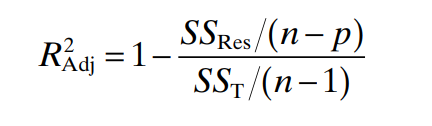

In [90]:
X_train.shape[1]

13

In [91]:
#y_test needs to be a np array so we can use the correct indices
y_test =np.array(y_test)

#Set to 0
SS_res = 0

#So we don't have to continously call len() function
length = len(y_test)

#Sum the square of the difference between real and predicted
for i in range(length):
    SS_res += (y_test[i] - y_hat[i])**2

#Set to 0
SS_total = 0

#Total will be used for calculating mean first
total = 0

for i in range(length):
    total += y_test[i]

mean = total/length

#Sum the square of the difference between real and average of our test data
for i in range (length):
    SS_total += (y_test[i] - mean)**2

print("SS_res:",SS_res)
print("SS_total:",SS_total)

p = 13

#Calculate R^2 adjusted
R_adj = 1- ((SS_res/(length-p))/(SS_total/(length-1)))

print("Adjusted R^2:",R_adj)

#Calculate MSRes (a.k.a σ^2)

MS_res = SS_res/(length-p)

print("MS_res:",MS_res)

SS_res: 193120871708750.44
SS_total: 550948156853211.0
Adjusted R^2: 0.6056598466301267
MS_res: 2011675746966.1504


For the sake of ruling out overfitting, we will also calculate for training data

In [92]:
#New y_hat but for training data
y_hat_train = np.dot(X_train,beta)

for i in range(len(y_train)):
    
    print(f"y_hat_train = {y_hat_train[i]:.2f} | y_train = {y_train.iloc[i]:.2f}")


#y_test needs to be a np array so we can use the correct indices
y_train =np.array(y_train)

#Set to 0
SS_res_train = 0

#So we don't have to continously call len() function
length_train = len(y_train)

#Sum the square of the difference between real and predicted
for i in range(length_train):

    SS_res_train += (y_train[i] - y_hat_train[i])**2

#Set to 0
SS_total_train = 0

#Total will be used for calculating mean first
total_train = 0

for i in range(length_train):

    total_train += y_train[i]

mean_train = total_train/length_train

#Sum the square of the difference between real and average of our test data
for i in range (length_train):

    SS_total_train += (y_train[i] - mean_train)**2

print("SS_res_train:",SS_res_train)

print("SS_total_train:",SS_total_train)

#Calculate R^2 adjusted
R_adj_train = 1- ((SS_res_train/(length_train-p))/(SS_total_train/(length_train-1)))

print("Adjusted R^2_train:",R_adj_train)

#Calculate MSRes (a.k.a σ^2)

MS_res_train = SS_res_train/(length_train-p)

print("MS_res_train:",MS_res_train)

y_hat_train = 7141157.65 | y_train = 7525000.00
y_hat_train = 6839782.37 | y_train = 6300000.00
y_hat_train = 4850618.98 | y_train = 3920000.00
y_hat_train = 4023026.83 | y_train = 3430000.00
y_hat_train = 3268832.99 | y_train = 3010000.00
y_hat_train = 4169559.34 | y_train = 4620000.00
y_hat_train = 3292417.87 | y_train = 1750000.00
y_hat_train = 2808521.11 | y_train = 3010000.00
y_hat_train = 2361351.83 | y_train = 2520000.00
y_hat_train = 3608383.66 | y_train = 3710000.00
y_hat_train = 4044862.28 | y_train = 3703000.00
y_hat_train = 3715637.98 | y_train = 2450000.00
y_hat_train = 4727182.11 | y_train = 4200000.00
y_hat_train = 3829937.11 | y_train = 3640000.00
y_hat_train = 4219716.74 | y_train = 3640000.00
y_hat_train = 5910706.63 | y_train = 5383000.00
y_hat_train = 2387786.91 | y_train = 1767150.00
y_hat_train = 5819319.42 | y_train = 5250000.00
y_hat_train = 3362294.02 | y_train = 3500000.00
y_hat_train = 7913712.43 | y_train = 6790000.00
y_hat_train = 6511926.60 | y_train = 392

We see that the model is mildly overfitting, as our $R^2_A$ < $R^2_A (training)$

We can proceed with creating a residual plot

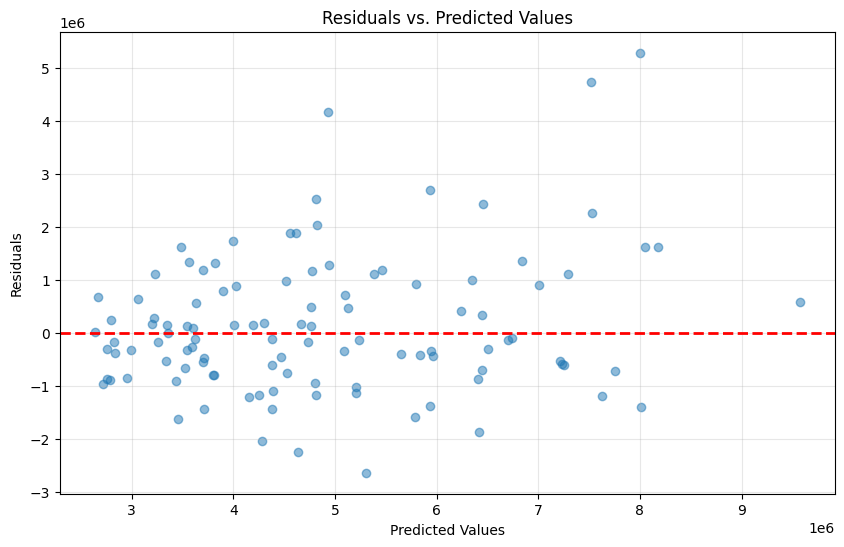

In [93]:
residuals = y_test - y_hat

plt.figure(figsize=(10, 6))

plt.scatter(y_hat, residuals, alpha=0.5)

plt.axhline(y=0, color='r', linestyle='--', linewidth=2)

plt.xlabel('Predicted Values')

plt.ylabel('Residuals')

plt.title('Residuals vs. Predicted Values')

plt.grid(True, alpha=0.3)

plt.show()

From this figure, we can see that the plot shows heteroscedasticity (slight funnel shape). This indicates that at higher house prices, the model becomes less reliable. To try and fix this, we introduce log transformation for the house price

In [94]:
y_log = np.log(y)

# New train-test split with log-transformed y
X_train, X_test, ylog_train, ylog_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Recalculate X_transpose and p1 with the NEW split
X_transpose = np.transpose(X_train)

X_mult_X_transpose = np.dot(X_transpose, X_train)

p1 = inv(X_mult_X_transpose)

# Recalculate p2
p2 = np.dot(X_transpose, ylog_train)

beta_log = np.dot(p1, p2)

#Print new multiple regression model where equation 2 corresponds to model built with beta vector from log transformation of y

equation2 = f"y = {beta_log[0]:.4f}"

for i in range(1, len(beta_log)):

    if beta_log[i] >= 0:

        equation2 += f" + {beta_log[i]:.4f}*x{i}"

    else:

        equation2 += f" - {abs(beta_log[i]):.4f}*x{i}"

(With log-transformation) $y = 14.3012 + 0.0000x_1 + 0.0215x_2 + 0.1888x_3 + 0.0817x_4 + 0.1112x_5 + 0.0550x_6 + 0.1010x_7 + 0.1323x_8 + 0.1538x_9 + 0.0375x_{10} + 0.1257x_{11} + 0.0572x_{12}$


(Original) $y = -127711.1674 + 235.8488x_1 + 78574.4924x_2 + 1097117.2661x_3 + 406223.1645x_4 + 366824.1924x_5 + 233146.7656x_6 + 393159.7787x_7 + 687881.3110x_8 + 785550.5793x_9 + 225756.5140x_{10} + 629901.6608x_{11} + 210397.1183x_{12}$


In [95]:
#Make predictions
ylog_hat = np.dot(X_test, beta_log)

#Transform predictions back to normal scale
y_hat = np.exp(ylog_hat)

# Convert to numpy array to use positional indexing
ylog_test_np = np.array(ylog_test)

#Transform actual values back to original scale
y_test_original = np.exp(ylog_test_np)

for i in range(len(ylog_test_np)):

    print(f"y_hat_log = {ylog_hat[i]:.2f} | y_test_log = {ylog_test_np[i]:.2f}")

y_hat_log = 15.35 | y_test_log = 15.22
y_hat_log = 15.81 | y_test_log = 15.71
y_hat_log = 14.98 | y_test_log = 15.13
y_hat_log = 15.28 | y_test_log = 15.68
y_hat_log = 15.05 | y_test_log = 14.85
y_hat_log = 15.07 | y_test_log = 15.40
y_hat_log = 15.50 | y_test_log = 15.47
y_hat_log = 15.68 | y_test_log = 15.33
y_hat_log = 14.86 | y_test_log = 14.71
y_hat_log = 14.88 | y_test_log = 15.03
y_hat_log = 16.22 | y_test_log = 16.13
y_hat_log = 14.91 | y_test_log = 14.79
y_hat_log = 14.95 | y_test_log = 15.03
y_hat_log = 15.02 | y_test_log = 15.03
y_hat_log = 15.12 | y_test_log = 14.64
y_hat_log = 15.32 | y_test_log = 14.79
y_hat_log = 14.96 | y_test_log = 14.79
y_hat_log = 15.31 | y_test_log = 15.81
y_hat_log = 15.25 | y_test_log = 14.89
y_hat_log = 15.07 | y_test_log = 14.87
y_hat_log = 15.51 | y_test_log = 15.72
y_hat_log = 15.57 | y_test_log = 15.51
y_hat_log = 14.90 | y_test_log = 14.45
y_hat_log = 15.33 | y_test_log = 15.47
y_hat_log = 15.41 | y_test_log = 15.25
y_hat_log = 15.85 | y_tes

Now, we can calculate our new $R^2_A$ for the new model to test its adequacy

In [96]:
ylog_test = np.array(ylog_test)

#Set to 0
SS_res = 0

#So we don't have to continuously call len() function
length_log = len(ylog_test)

#Sum the square of the difference between real and predicted
for i in range(length_log):

    SS_res += (ylog_test[i] - ylog_hat[i])**2

#Set to 0
SS_total = 0

#Total will be used for calculating mean first
total = 0

for i in range(length_log):

    total += ylog_test[i]

mean = total/length_log

#Sum the square of the difference between real and average of our test data
for i in range(length_log):

    SS_total += (ylog_test[i] - mean)**2

print("SS_res_log-transformed:", SS_res)

print("SS_total_log-transformed:", SS_total)

#Calculate R^2 adjusted
R_adj = 1- ((SS_res/(length_log-p))/(SS_total/(length_log-1)))

print("Adjusted R^2 (log-transformed):", R_adj)

#Calculate MSRes (a.k.a σ^2)
MS_res = SS_res/(length_log-p)

print("MS_res_log-transformed:", MS_res)

SS_res_log-transformed: 7.241450863314294
SS_total_log-transformed: 21.046671876739563
Adjusted R^2 (log-transformed): 0.6129253941459454
MS_res_log-transformed: 0.07543177982619056


Our new $R^2_A$ obtained using this method resulted in our most signifiant model yet. Now, we plot the residuals

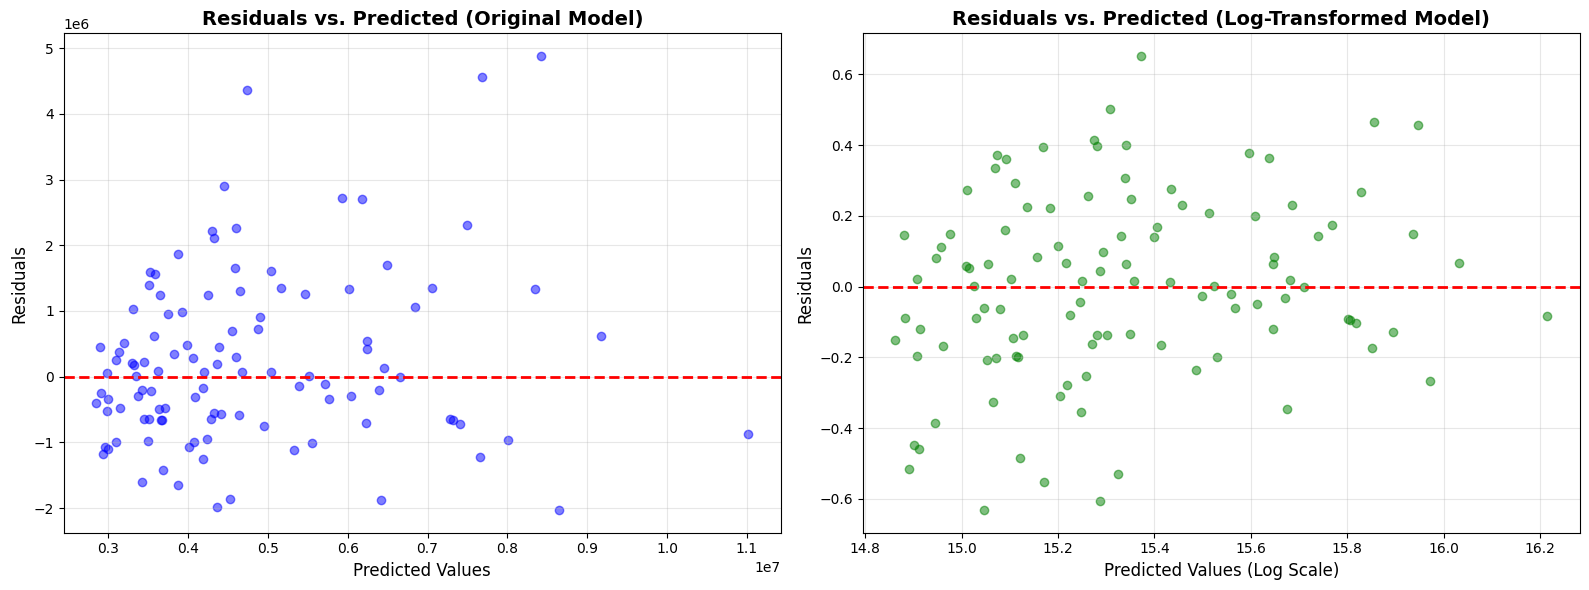

In [97]:
residuals_original = y_test - y_hat  # Original model

residuals_log = ylog_test - ylog_hat  # Log-transformed model

# Create figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Original Model Residuals
axes[0].scatter(y_hat, residuals_original, alpha=0.5, color='blue')

axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)

axes[0].set_xlabel('Predicted Values', fontsize=12)

axes[0].set_ylabel('Residuals', fontsize=12)

axes[0].set_title('Residuals vs. Predicted (Original Model)', fontsize=14, fontweight='bold')

axes[0].grid(True, alpha=0.3)

# Plot 2: Log-Transformed Model Residuals
axes[1].scatter(ylog_hat, residuals_log, alpha=0.5, color='green')

axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)

axes[1].set_xlabel('Predicted Values (Log Scale)', fontsize=12)

axes[1].set_ylabel('Residuals', fontsize=12)

axes[1].set_title('Residuals vs. Predicted (Log-Transformed Model)', fontsize=14, fontweight='bold')

axes[1].grid(True, alpha=0.3)

plt.tight_layout()

plt.show()

Looking at this residual plot, we can see that we no longer have that funnel shape we had from our original model. However, the very slight increase in the $R^2_A$ from log-transforming our response variable (price) actually displays that heteroscedasticity wasn't severely hindering the model

With this, we have a current model that uses log transformation to secure a $R^2_A$ of 0.609, meaning that the model can explain ~ 61% of variance in the dependent variable. This is decent, but implies that we have more room to improve by some means. 

An important remark worth noting is the possibility that a feature's effect depends on another feature's value. In housing prices, we can make some logical assumptions about the relation between certain features and see if adding them in the model improves the performance of the model. These are known as interaction terms

In [98]:
#We first list the most reasonable feasible interaction terms

interaction1 = X['area'] * X['bedrooms']

interaction2 = X['area'] * X['stories']

interaction3 = X['area'] * X['airconditioning']

interaction4 = X['bedrooms'] * X['basement']

In [99]:
X.loc[:, "interaction1"] = list(interaction1)

X.loc[:, "interaction2"] = list(interaction2)

X.loc[:, "interaction3"] = list(interaction3)

X.loc[:, "interaction4"] = list(interaction4)

X

,intercept,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,interaction1,interaction2,interaction3,interaction4
0,1,7420,4,2,3,1,0,0,0,1,2,1,2,29680,22260,7420,0
1,1,8960,4,4,4,1,0,0,0,1,3,0,2,35840,35840,8960,0
2,1,9960,3,2,2,1,0,1,0,0,2,1,1,29880,19920,0,3
3,1,7500,4,2,2,1,0,1,0,1,3,1,2,30000,15000,7500,4
4,1,7420,4,1,2,1,1,1,0,1,2,0,2,29680,14840,7420,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1,3000,2,1,1,1,0,1,0,0,2,0,0,6000,3000,0,2
541,1,2400,3,1,1,0,0,0,0,0,0,0,1,7200,2400,0,0
542,1,3620,2,1,1,1,0,0,0,0,0,0,0,7240,3620,0,0
543,1,2910,3,1,1,0,0,0,0,0,0,0,2,8730,2910,0,0


Rebuild Beta vector for new model with interaction terms and print equation

In [100]:
y_log = np.log(y)

X_train, X_test, ylog_train, ylog_test = train_test_split(X,y_log,test_size=0.2,random_state=42)

X_transpose = X_train.T

X_mult_X_transpose = np.dot(X_transpose, X_train)

p1 = inv(X_mult_X_transpose)

p2 = np.dot(X_transpose,ylog_train)

beta_interaction = np.dot(p1,p2)

# Build equation
equation = f"y = {beta_interaction[0]:.4f}"

for i in range(1, len(beta_interaction)):

    if beta_interaction[i] >= 0:

        equation += f" + {beta_interaction[i]:.4f}*x{i}"

    else:

        equation += f" - {abs(beta_interaction[i]):.4f}*x{i}"

$y = 14.3167 + 0.0000x_1 + 0.0148x_2 + 0.1883x_3 + 0.0895x_4 + 0.1113x_5 + 0.0548x_6 + 0.1334x_7 + 0.1348x_8 + 0.1261x_9 + 0.0373x_{10} + 0.1258x_{11} + 0.0568x_{12} + 0.0000x_{13} - 0.0000x_{14} + 0.0000x_{15} - 0.0109x_{16}$

Test the multiple regression model with interaction terms

In [101]:
#Make predictions

ylog_hat_interaction = np.dot(X_test,beta_interaction)

#Transformn predictions back to normal scale

y_hat = np.exp(ylog_hat_interaction)

y_test_original = np.exp(ylog_test)

Test new model Assess adequacy of model with interaction terms

In [102]:
ylog_test = np.array(ylog_test)

SS_res = 0

length = len(ylog_test)

for i in range(length):

    SS_res += (ylog_test[i] - ylog_hat_interaction[i])**2 

SS_total = 0

total = 0

for i in range(length):

    total += ylog_test[i]

mean = total/length

for i in range(length):

    SS_total += (ylog_test[i] - mean)**2

print("SS_res (interaction term):", SS_res)

print("SS_total (interaction term):", SS_total)

R_adj = 1- ((SS_res/(length-17))/(SS_total/(length-1)))

print("Adjusted R^2 (interaction term):", R_adj)

MS_res = SS_res/(length-17)

print("MS_res (interaction term):", MS_res)

SS_res (interaction term): 7.290614878390336
SS_total (interaction term): 21.046671876739563
Adjusted R^2 (interaction term): 0.5933538589453728
MS_res (interaction term): 0.07924581389554713


Interaction terms resulted in a lower $R^2_{Adj}$, so we can remove them and stick to our original multiple regression with log-transformed response variables

In [103]:
X.drop(columns=['interaction1', 'interaction2', 'interaction3', 'interaction4'], inplace=True)

Before we choose to further optimize the model, we check for multicollinearity to see if either lasso or ridge regression should be used

In [104]:
#Calculate VIF for each feature to check for multicollinearity

for columns in range(len(X.columns)):

    curr = X.columns[columns]

    X_temp = X.drop(columns=[curr])

    y_temp = X[curr]
    
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp,y_temp,test_size=0.2,random_state=42)

    X_transpose_temp = np.transpose(X_train_temp)

    X_mult_X_transpose_temp = np.dot(X_transpose_temp, X_train_temp)

    p1_temp = inv(X_mult_X_transpose_temp)

    p2_temp = np.dot(X_transpose_temp,y_train_temp)

    beta_temp = np.dot(p1_temp,p2_temp)

    y_hat_temp = np.dot(X_test_temp,beta_temp)

    SS_res_temp = 0

    length_temp = len(y_test_temp)

    for i in range(length_temp):

        SS_res_temp += (y_test_temp.iloc[i] - y_hat_temp[i])**2

    total_temp = 0

    for i in range(length_temp):

        total_temp += y_test_temp.iloc[i]

    mean_temp = total_temp/length_temp

    SS_total_temp = 0

    for i in range (length_temp):

        SS_total_temp += (y_test_temp.iloc[i] - mean_temp)**2

    R_squared = 1- (SS_res_temp/SS_total_temp)

    VIF = 1/(1-R_squared)

    print(f"VIF for {curr}: {VIF}")

VIF for intercept: 0.0
VIF for area: 1.3432803032806089
VIF for bedrooms: 1.2649137071315606
VIF for bathrooms: 1.1989664174648522
VIF for stories: 1.2767930514076213
VIF for mainroad: 1.107537263346393
VIF for guestroom: 1.0073630783149576
VIF for basement: 1.0595084933600003
VIF for hotwaterheating: 1.0116272614510107
VIF for airconditioning: 0.9996642066549675
VIF for parking: 1.18495825478529
VIF for prefarea: 1.113247965171767
VIF for furnishingstatus: 1.0160738173384682


C:\Users\naik_\AppData\Local\Temp\ipykernel_3376\3033884808.py:47: RuntimeWarning: divide by zero encountered in scalar divide
  R_squared = 1- (SS_res_temp/SS_total_temp)


From this, we can see that there is absolutely no multicollinearity amongst our predictors. In this instance, we can proceed with using a Lasso regression

In [105]:
# Use log-transformed y
y_log = np.log(y)

# Train-test split (same as your other models)
X_train, X_test, ylog_train, ylog_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Standardize features (sklearn handles this properly)
# Remove intercept before scaling if it exists
if 'intercept' in X_train.columns:

    X_train_no_intercept = X_train.drop(columns=['intercept'])

    X_test_no_intercept = X_test.drop(columns=['intercept'])

else:

    X_train_no_intercept = X_train

    X_test_no_intercept = X_test

# Standardize
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_no_intercept)

X_test_scaled = scaler.transform(X_test_no_intercept)

# Fit Lasso with cross-validation (automatically finds best lambda)

lasso = LassoCV(cv=5, random_state=42, max_iter=10000)

lasso.fit(X_train_scaled, ylog_train)

# Make predictions

ylog_hat_lasso = lasso.predict(X_test_scaled)

# Calculate R²

R2_lasso = r2_score(ylog_test, ylog_hat_lasso)

# Calculate adjusted R²

n_test = len(ylog_test)

n_features = X_train_scaled.shape[1]

R2_adj_lasso = 1 - ((1 - R2_lasso) * (n_test - 1) / (n_test - n_features - 1))

print(f"Lasso R²: {R2_lasso:.6f}")

print(f"Lasso Adjusted R²: {R2_adj_lasso:.6f}")

print(f"Optimal lambda (alpha): {lasso.alpha_:.6f}")

# Show which features are important

feature_names = X_train_no_intercept.columns

coefficients = lasso.coef_

print("\nFeature Coefficients:")

for name, coef in zip(feature_names, coefficients):

    if abs(coef) > 1e-10:  # Non-zero

        print(f"{name}: {coef:.6f}")

    else:

        print(f"{name}: 0.0 (eliminated)")

print(f"\nNumber of features used: {np.sum(np.abs(coefficients) > 1e-10)} out of {len(coefficients)}")

Lasso R²: 0.655630
Lasso Adjusted R²: 0.612583
Optimal lambda (alpha): 0.000191

Feature Coefficients:
area: 0.105566
bedrooms: 0.016029
bathrooms: 0.089986
stories: 0.069927
mainroad: 0.038735
guestroom: 0.021016
basement: 0.048311
hotwaterheating: 0.028772
airconditioning: 0.070895
parking: 0.031987
prefarea: 0.053122
furnishingstatus: 0.042912

Number of features used: 12 out of 12


Strongest Predictors:


- Area (0.106): Most influential feature


- Bathrooms (0.090): Strong positive impact


- Airconditioning (0.071) and Stories (0.070): Moderate-strong impact

Weaker Predictors:

- Bedrooms (0.016): Weakest predictor

- Guestroom (0.021) and Hotwaterheating (0.029): Limited impact

Result:
- The minimal regularization (alpha ≈ 0.0002) indicates the model was already well-specified, with Lasso performing nearly identically to OLS. This validates that all features contribute meaningfully without redundancy or overfitting.